In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Cinema

In [2]:
cinema = pd.read_csv('cinemaTicket_Ref.csv', index_col=False)
cinema.date = pd.to_datetime(cinema.date)
cinema

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


In [3]:
cinema_percentage = cinema.groupby('date')[['occu_perc', 'total_sales']].mean()
cinema_percentage = cinema_percentage[2:]
cinema_percentage.to_csv('cinema_daily.csv')
cinema_percentage

,occu_perc,total_sales
date,,
2018-03-14,11.457937,1.376438e+07
2018-03-15,16.925195,1.938965e+07
2018-03-16,17.678305,1.825982e+07
2018-03-17,13.620901,1.011202e+07
2018-03-18,11.631185,9.086891e+06
...,...,...
2018-10-31,13.084963,7.217775e+06
2018-11-01,20.348762,1.277726e+07
2018-11-02,21.733965,1.424663e+07


Text(0.5, 0, 'Time')

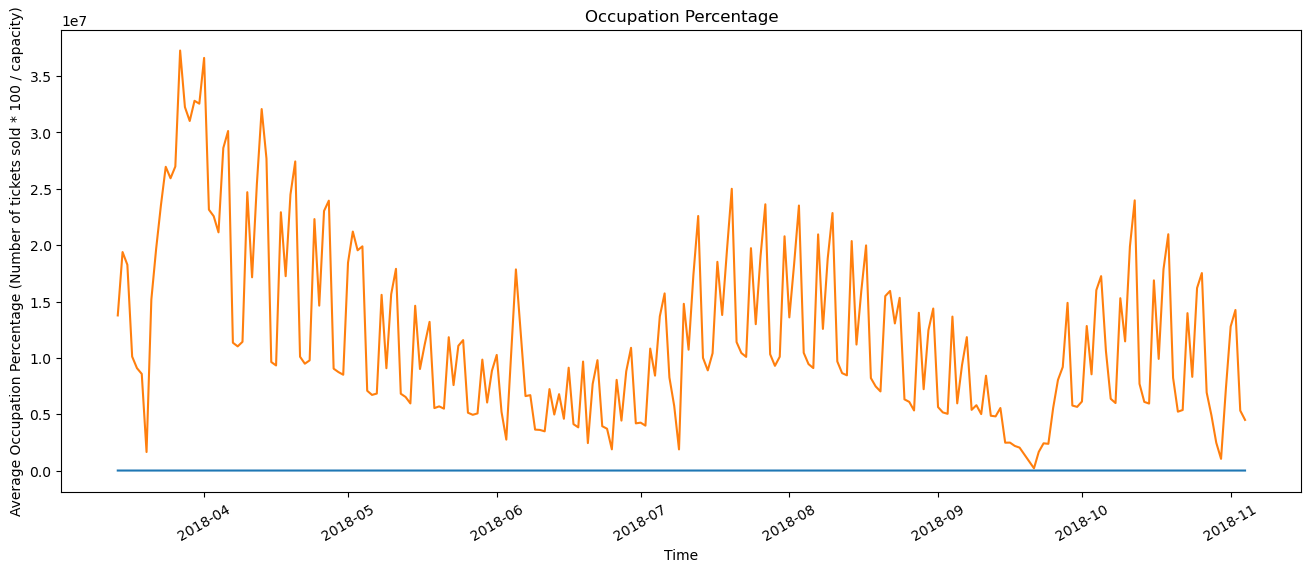

In [4]:
plt.figure(figsize=(16, 6))
plt.plot(cinema_percentage)
plt.title('Occupation Percentage')
plt.xticks(rotation=30)
plt.ylabel('Average Occupation Percentage (Number of tickets sold * 100 / capacity)')
plt.xlabel('Time')

## 2. Solar Energy Production (2015 - 2023)

In [247]:
solar_energy2 = pd.read_csv('solar_energy_prod2.csv')
solar_energy2.date = pd.to_datetime(solar_energy2.date)
solar_energy2

,date,hour,solar_kwh
0,2017-09-11,08:00,1.130
1,2017-09-11,09:00,2.340
2,2017-09-11,10:00,3.656
3,2017-09-11,11:00,4.577
4,2017-09-11,12:00,6.506
...,...,...,...
258418,2023-03-12,15:00,201.285
258419,2023-03-12,16:00,162.582
258420,2023-03-12,17:00,107.060
258421,2023-03-12,18:00,43.074


In [249]:
solar_energy2_daily = solar_energy2.groupby('date')['solar_kwh'].mean()
solar_energy2_daily

date
2015-09-01    28.601300
2015-09-02    32.459333
2015-09-03    30.852667
2015-09-04     5.122400
2015-09-05     4.917474
                ...    
2023-03-12    18.737352
2023-03-13    18.010049
2023-03-14    22.599795
2023-03-15    28.685721
2023-03-16    35.848796
Name: solar_kwh, Length: 2716, dtype: float64

Text(0.5, 0, 'Time')

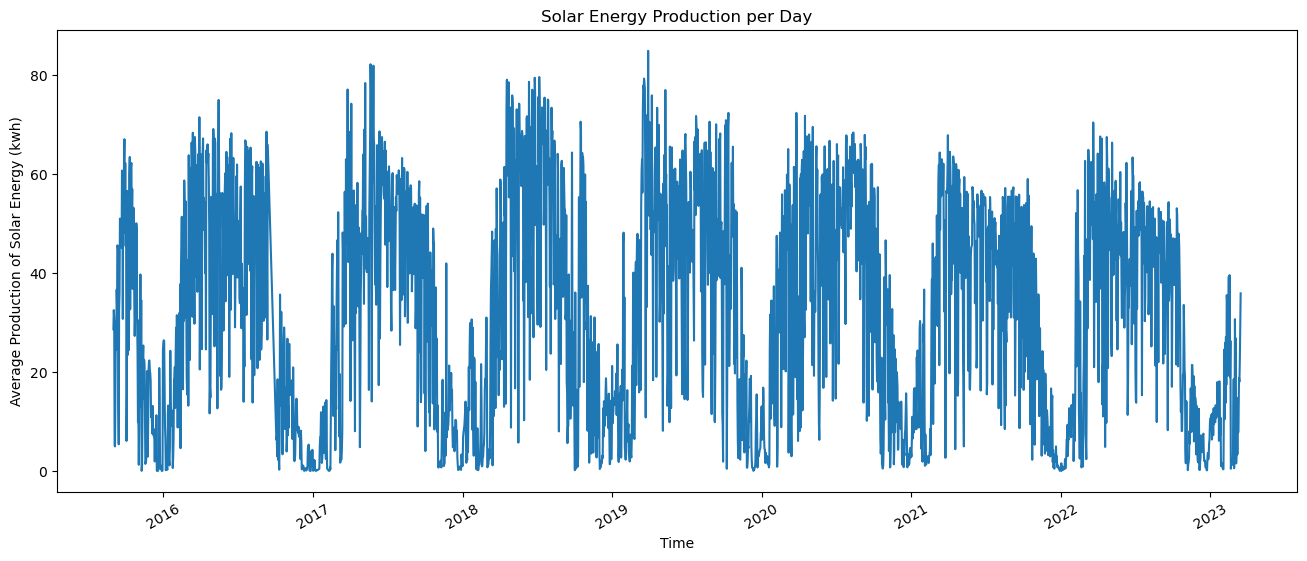

In [251]:
plt.figure(figsize=(16, 6))
plt.plot(solar_energy2_daily)
plt.title('Solar Energy Production per Day')
plt.xticks(rotation=30)
plt.ylabel('Average Production of Solar Energy (kwh)')
plt.xlabel('Time')

In [253]:
solar_energy2_monthly = solar_energy2.groupby(pd.Grouper(key='date', freq='M'))['solar_kwh'].mean()
solar_energy2_monthly

date
2015-09-30    35.172150
2015-10-31    41.510052
2015-11-30    15.819574
2015-12-31     7.939926
2016-01-31    11.288875
                ...    
2022-11-30    10.510767
2022-12-31     4.097272
2023-01-31    10.740021
2023-02-28    21.012799
2023-03-31    17.468008
Freq: M, Name: solar_kwh, Length: 91, dtype: float64

Text(0.5, 0, 'Time')

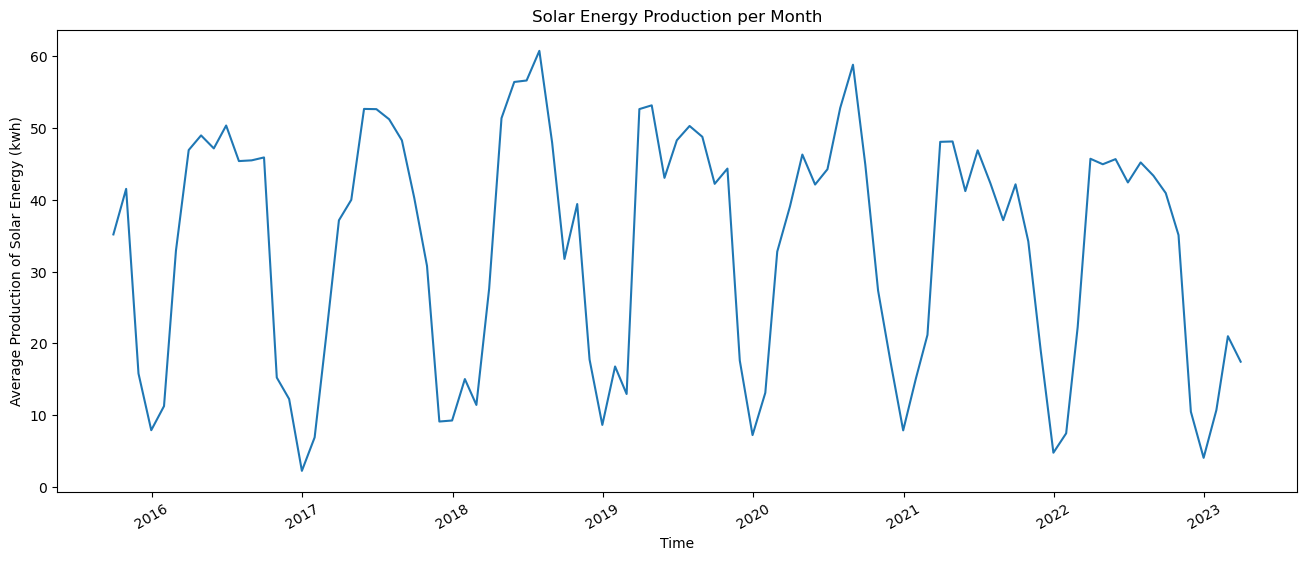

In [255]:
plt.figure(figsize=(16, 6))
plt.plot(solar_energy2_monthly)
plt.title('Solar Energy Production per Month')
plt.xticks(rotation=30)
plt.ylabel('Average Production of Solar Energy (kwh)')
plt.xlabel('Time')

## 3. Solar Energy Production (2007 - 2020)

In [235]:
solar_energy = pd.read_csv('solar_energy_prod1.csv')
solar_energy.date = pd.to_datetime(solar_energy.date)
solar_energy

,date,hour,solar_mw
0,2020-08-03,0:00,11385
1,2020-08-02,23:00,12390
2,2020-08-02,22:00,13312
3,2020-08-02,21:00,13832
4,2020-08-02,20:00,14038
...,...,...,...
116112,2007-05-01,5:00,6445
116113,2007-05-01,4:00,6452
116114,2007-05-01,3:00,6583
116115,2007-05-01,2:00,6803


In [132]:
solar_energy_daily = solar_energy.groupby('date')['solar_mw'].mean()
solar_energy_daily

date
2007-05-01     7812.347826
2007-05-02     8608.083333
2007-05-03     8665.000000
2007-05-04     8628.791667
2007-05-05     8702.541667
                  ...     
2020-07-30    11738.541667
2020-07-31    12287.000000
2020-08-01    13579.708333
2020-08-02    12962.333333
2020-08-03    11385.000000
Name: solar_mw, Length: 4840, dtype: float64

Text(0.5, 0, 'Time')

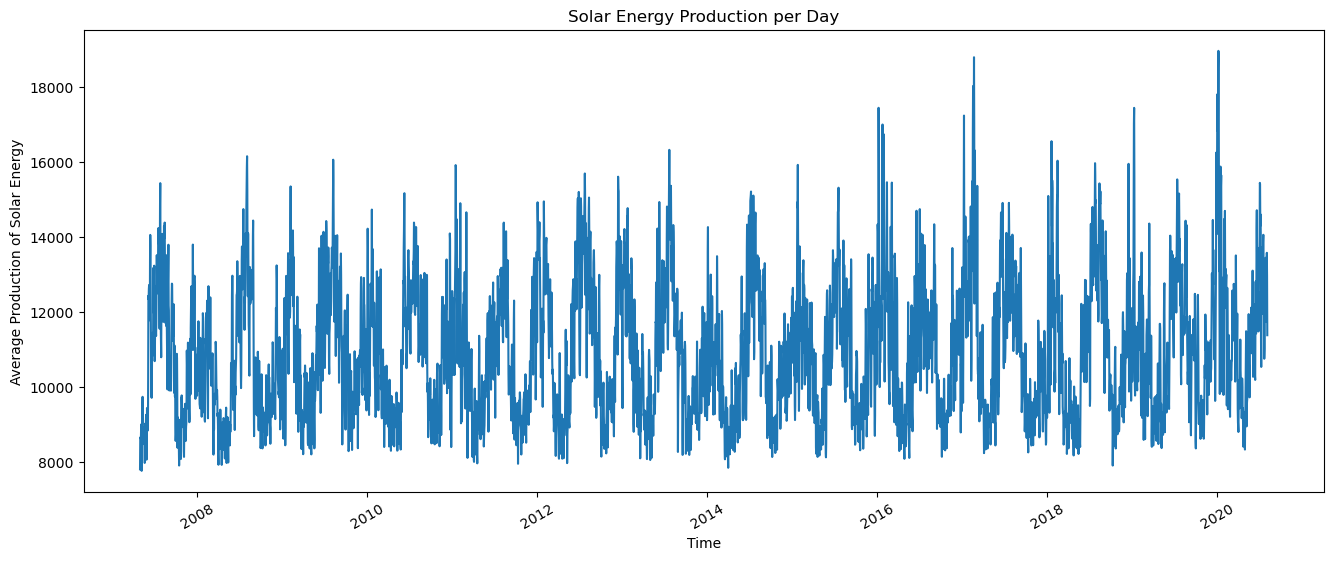

In [133]:
plt.figure(figsize=(16, 6))
plt.plot(solar_energy_daily)
plt.title('Solar Energy Production per Day')
plt.xticks(rotation=30)
plt.ylabel('Average Production of Solar Energy')
plt.xlabel('Time')

In [134]:
solar_energy_monthly = solar_energy.groupby(pd.Grouper(key='date', freq='M'))['solar_mw'].mean()
solar_energy_monthly

date
2007-05-31     8681.652759
2007-06-30    11438.859722
2007-07-31    12654.297043
2007-08-31    12746.483871
2007-09-30    11017.173611
                  ...     
2020-04-30     9526.198611
2020-05-31    10869.809140
2020-06-30    12118.401389
2020-07-31    12798.516129
2020-08-31    13232.530612
Freq: M, Name: solar_mw, Length: 160, dtype: float64

Text(0.5, 0, 'Time')

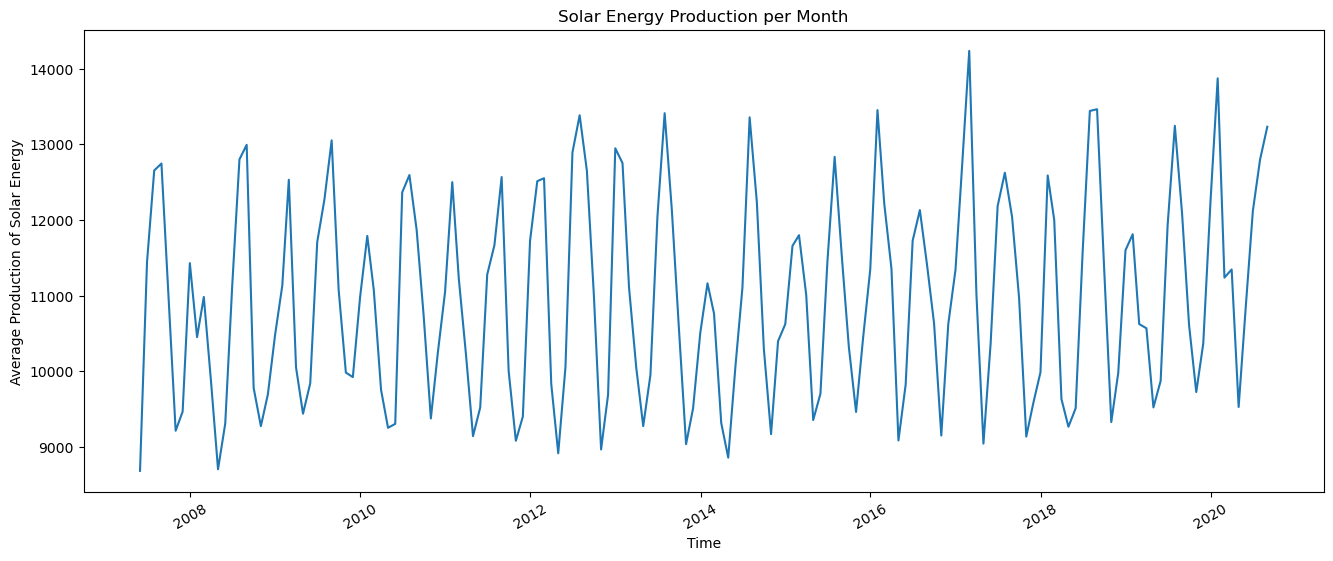

In [135]:
plt.figure(figsize=(16, 6))
plt.plot(solar_energy_monthly)
plt.title('Solar Energy Production per Month')
plt.xticks(rotation=30)
plt.ylabel('Average Production of Solar Energy')
plt.xlabel('Time')